In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
import sklearn.metrics as metrics

In [ ]:
# Visualising samples:
def visual(arr):
    # plt.hist(arr) # make this more sophisticated? seaborn?
    sb.histplot(data= arr, stat= 'density', binwidth= 0.05, kde= True)
    plt.show()

#### Method for producing the sum and mean of many random variables following the same distribution

In [150]:
# We will now write down a method for drawing n samples from a given distribution P, 
# and then repeating this m times, and each time summing up the sum of the n samples,
# and then plotting the a histogram of these sums

def demonstrate_clt(n,m,pdf,*args,show_plot=True):
    '''

    n -> # of random variables belonging to the same dist. ; to be summed over
    m -> # of times the mean is sampled 
    (Increasing this increases the resolution/smoothness of resulting dist. of means)
    pdf -> prob. distribution from which random var. are sampled
    *args -> parameters of the pdf

    np.random.normal
    np.random.poisson
    np.random.exponential 
    '''
    means = []
    scale,size,*mean = args
    for i in range(m):
        if pdf.__name__ == 'normal' :                 
            temp_samples = pdf(mean,scale,size) 
        elif pdf.__name__ =='poisson' :
            temp_samples = pdf(scale**2,size) # passing mean into the poisson distribution as std**2
        elif pdf.__name__ == 'exponential' :
            temp_samples = pdf(scale,size) # standard deviation is equal to mean
            # What to do for exponential dist?
            

        sample_avg = np.sum(temp_samples)/n
        means.append(sample_avg)
    
    means = np.array(means)
    if show_plot:
        visual(means)
    return means

$P(x) = \frac{1}{\sigma \sqrt{2\pi}} \text{exp}\left(- \frac{ (x-\mu)^2} {2 \sigma^2} \right)$

#### Function for Gaussian Fit

In [151]:
# Function for fitting a gaussian to the probability density of a given sample

def get_histogram(arr, num_bins):
    dat = np.histogram(arr,bins= num_bins,density=True)
    hist, bin_edges = dat

    # We put the normalised density of given bin at the centre of the bin 
    bin_centres = []
    for i in range(num_bins):
        bin_centres.append((bin_edges[i] + bin_edges[i+1])/2)
    bin_centres = np.array(bin_centres)

    return bin_centres,hist

def smoothen(hist, bin_centres):
    zero_indices = []
    num_bins = np.size(bin_centres)
    for i in range(num_bins):
        if hist[i] == 0:
            zero_indices.append(i)
    hist_smooth = np.delete(hist,zero_indices)
    bin_centres_mod = np.delete(bin_centres,zero_indices)
    return bin_centres_mod, hist_smooth

def gauss_fit(arr, num_bins, loglinear_plot=True, show_plot=True):
    '''
    Issue - we must truncate the data from the right and left to get the best fit. 
    The edges are 
    Question - is there are way of indicating a good or a bad fit?
    '''
   
    bin_centres,hist = get_histogram(arr,num_bins)
    
    # We now smooth this data by removing zeros
    bin_centres_mod, hist_smooth = smoothen(hist, bin_centres)

    # Now we will fit this data. Let us take a log of the hist data (Filter data to remove zeros)
    log_hist = np.log(hist_smooth)
    
    # Now we fit this to a quadratic curve line:
    p0,p1,p2 = np.polyfit(np.array(bin_centres_mod), log_hist, deg = 2)
    # We now get the best fit gaussian as follows:
    best_fit_log = p0*(bin_centres_mod)**2 + p1*(bin_centres_mod) + p2
    best_fit = np.exp(best_fit_log)

    # Visualising the fit
    
    # For visualising the polynomial fit after taking log
    if loglinear_plot:
        plt.title('Fitting in Log-Linear Plot')
        plt.plot(bin_centres_mod, log_hist)
        plt.plot(bin_centres_mod, best_fit_log)
        plt.show()

    if show_plot:
        plt.title('Given data and best fit gaussian curve')     # Add parameters in the graph
        plt.plot(bin_centres, hist)
        plt.plot(bin_centres_mod, best_fit)
        plt.show()

    return p0,p1,p2

## Demonstration of Central Limit Theorem for a Gaussian Distribution

In [ ]:
m = 10000 # This number should be kept high to sample the distribution of the means in the best way possible.
mu = 0
std = 1

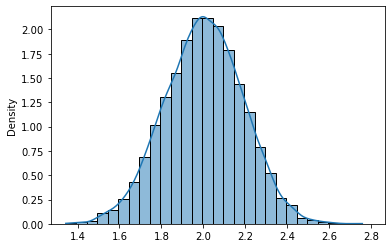

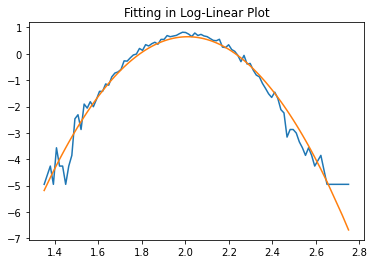

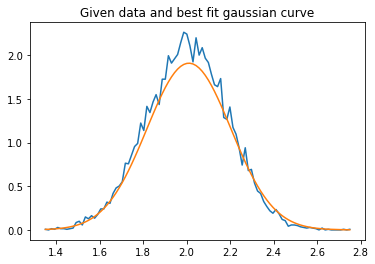

Linear coefficient (should be close to zero):  53.93037934234462
Normalization:  -53.569568604804815
Quadratic coefficient:  -13.4113087328801
Standard Deviation of fitted gaussian:  0.19308539371555994
Expected Value of Standard Deviation  0.18561192028752893
Calculated value of Standard Deviation  0.18588540732113937


In [177]:
n = 5
means = demonstrate_clt(n,m,np.random.normal,std,n,mu)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))


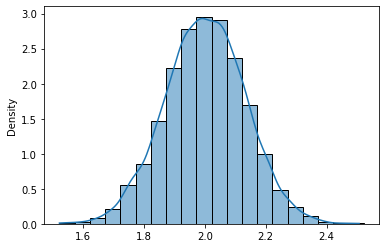

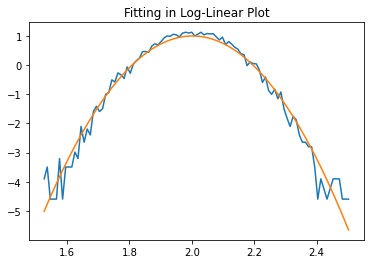

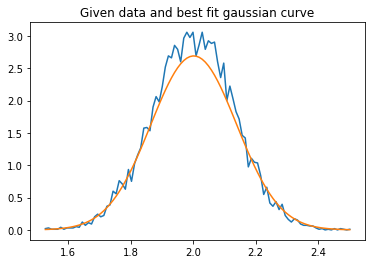

Linear coefficient (should be close to zero):  106.3411010622519
Normalization:  -105.46168518331619
Quadratic coefficient:  -26.557679901599446
Standard Deviation of fitted gaussian:  0.1372113180351531
Expected Value of Standard Deviation  0.13124744750436862
Calculated value of Standard Deviation  0.13146111276087738


In [178]:
n = 10
means = demonstrate_clt(n,m,np.random.normal,std,n,mu)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))

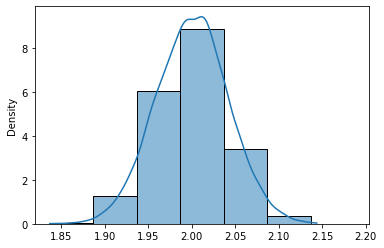

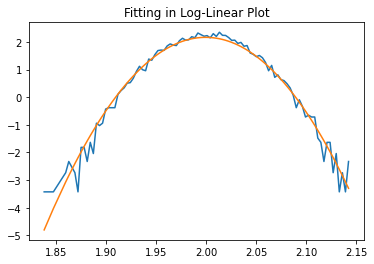

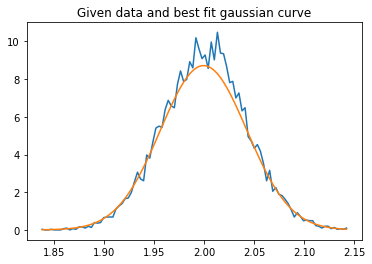

Linear coefficient (should be close to zero):  1071.9123798607538
Normalization:  -1069.3926378219942
Quadratic coefficient:  -268.06662699018926
Standard Deviation of fitted gaussian:  0.04318805316120493
Expected Value of Standard Deviation  0.0415040871197187
Calculated value of Standard Deviation  0.041707956256230944


In [179]:
n = 100
means = demonstrate_clt(n,m,np.random.normal,std,n,mu)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))

As we can see, in all the cases, both for small $n$ and large $n$, the expected and calculated values of standard deviations are matching, which confirms the Central Limit Theorem for Gaussian distributions. The histograms obtained also visually represent normal distributions as required by the theorem.

## Central Limit Theorem for a Poissonian Distribution

In [180]:
m = 10000 # This number should be kept high to sample the distribution of the means in the best way possible.
std = 1

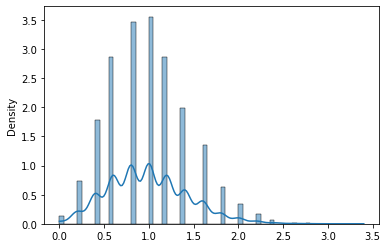

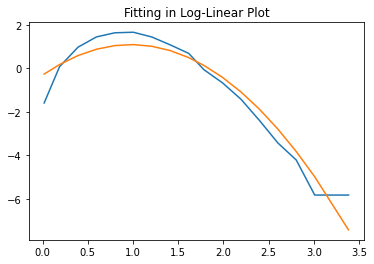

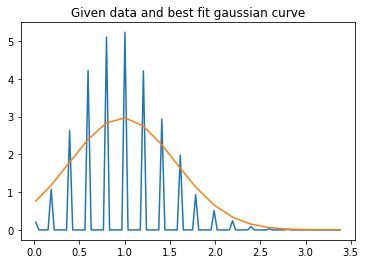

Linear coefficient (should be close to zero):  2.8771547966532833
Normalization:  -0.31734269352567424
Quadratic coefficient:  -1.4720972979456313
Standard Deviation of fitted gaussian:  0.5827962443009138
Expected Value of Standard Deviation  0.4472135954999579
Calculated value of Standard Deviation  0.4461900828122472


In [181]:
n = 5
means = demonstrate_clt(n,m,np.random.poisson,std,n)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))

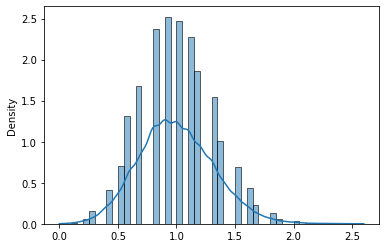

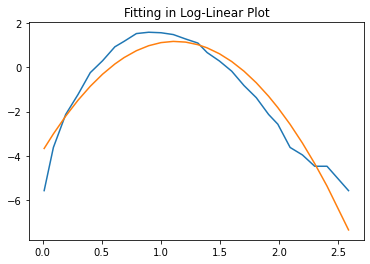

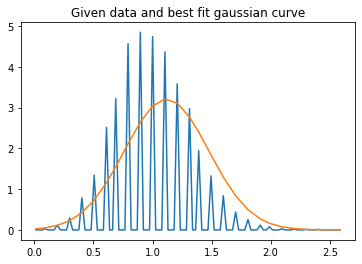

Linear coefficient (should be close to zero):  8.829684723199719
Normalization:  -3.7742609138710734
Quadratic coefficient:  -3.9446384054868293
Standard Deviation of fitted gaussian:  0.3560257440992839
Expected Value of Standard Deviation  0.31622776601683794
Calculated value of Standard Deviation  0.31633680215871185


In [185]:
n = 10
means = demonstrate_clt(n,m,np.random.poisson,std,n)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))

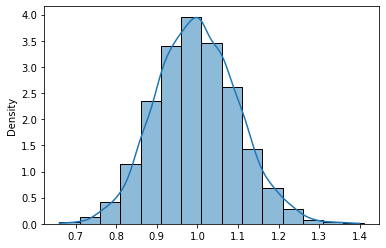

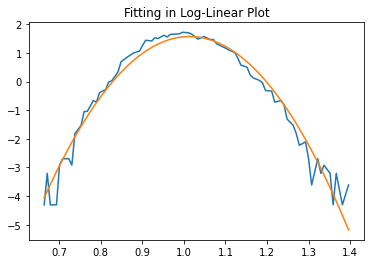

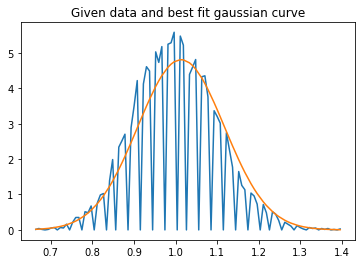

Linear coefficient (should be close to zero):  93.28779858204946
Normalization:  -45.69807477465617
Quadratic coefficient:  -46.027811468425725
Standard Deviation of fitted gaussian:  0.1042257045079875
Expected Value of Standard Deviation  0.1
Calculated value of Standard Deviation  0.10060707790210388


In [183]:
n = 100
means = demonstrate_clt(n,m,np.random.poisson,std,n)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))

We will now perform the following experiment. We will sample $n$ random variables from a poisson distribution of standard deviation $\sigma$ and perform an averaging of these $n$ random variables. Doing this $m$ times for large enough $m$ will give us a distribution of this mean. We will try this for various values of $\sigma$ and $n$ to see where the Central Limit Theorem works best. We will evaluate the correctness of the Central Limit Theorem using the mean-squared-error metric to establish how far two distributions are. This is because the mean square error is sensitive to amplitude differences (which the pearson correlation coefficient, for example, is not). We will see that for increasing $n$, this MSE error naturally reduces. By increasing $\sigma$, we also get lesser MSE errors. 

In [155]:
# Let us now test the CLT and print the respective standard deviations for the first 5 powers of 10 = n

n = np.arange(1,176) # The number of random variables 
# belonging to the same Poisson Distribution (given standard deviation)

std_list = [0.50,0.75,1.00,1.25,1.50,2.00] # The list of standard deviation
# of the original distribution from which 'n' samples are taken and averaged over. 

std_calculated = [] # for storing calculated standard deviations for the 
# distribution of the means of the 'n' samples extracted from the base distribution

frac_errors =[] # Errors in standard deviations (deviation from theoretical value)

metric = [] #mtric to see how far CLT is satisfied

show_output=False
show_plot=False

for std in std_list:
    frac_errors_std = []
    metric_std = []
    # metric and error in standard deviation of 
    # distribution of mean for given standard deviation of base distribution
    
    print('Calculating for STD of base distribution: ',std)
    for i in n:

        means = demonstrate_clt(i,m,np.random.poisson,std,i,show_plot=False)

        # Creating a gaussian curve with mean mu of the original distribution,
        # and STD of the original curve divided by sqrt(i)
        
        # First we obtain the binned version of the means data:
        bin_centres,hist = get_histogram(means, num_bins=100)
        # Now, we smooth and remove zeros from this data
        bin_centres_sm,hist_sm = smoothen(hist, bin_centres)

        # Using this bin_centres_smoothed data, we will construct our reference gaussian curve
        mu = std**2 # mean For poisson distribution
        sigma = std/np.sqrt(i) # standard deviation prescribed by central limit theorem
        ref_gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/(2*(sigma**2)))*((bin_centres_sm-mu)**2)) # reference gaussian curve

        if show_plot:
            if i%25==0:
                plt.plot(bin_centres_sm,hist_sm)
                plt.plot(bin_centres_sm,ref_gauss)
                plt.show()

        # Metric Calculations - to see how much the theoretical curve matches the observed curve
        mse = metrics.mean_squared_error(ref_gauss,hist_sm)
        metric_std.append(mse)

        # Standard Deviation of the output means data histogram
        mean_calc = np.average(means)
        std_calc = np.std(means)
        std_exp = sigma
        frac_errors_std.append(np.abs(std_exp-std_calc)/std_exp) 

        if i%50 == 0: print(i)
    metric.append(metric_std)
    frac_errors.append(frac_errors_std)

Calculating for STD of base distribution:  0.5
50
100
150
Calculating for STD of base distribution:  0.75
50
100
150
Calculating for STD of base distribution:  1.0
50
100
150
Calculating for STD of base distribution:  1.25
50
100
150
Calculating for STD of base distribution:  1.5
50
100
150
Calculating for STD of base distribution:  2.0
50
100
150


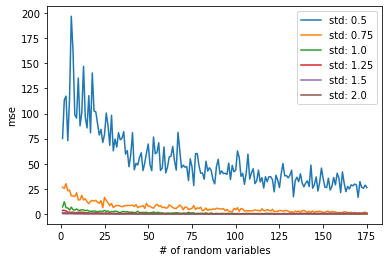

In [163]:
# We will now show the results of the experiments above
for i in range(len(std_list)):
    
    metric_std = metric[i]
    frac_errors_std = frac_errors[i]
    plt.plot(n,metric_std, label = "std: "+ str(std_list[i]))
plt.legend()
plt.ylabel('mse')
plt.xlabel('# of random variables')
plt.show()


As we can see, the mean squared error (between the curves predicted by central limit theorem and the actual distribution of the means) for standard deviation $0.5$ (of the base distribution for the random variables) is the highest, and it is the lowest for $\sigma = 2$. It also converges to $0$ for higher number of random variables $n$ for higher $\sigma$. One can easily define a cutoff or a threshold value of $n$ above which the mean squared error is within some infinitesimal range of $0$, say $\epsilon \sim 10^{-2}$. We will do this for the case of $\sigma = 1$

In [170]:
# Calculating the threshold number of random variables to be summed over 
# for satisfying Central Limit theorem for a base distribution of sigma = 1

i = 5 # some small starting number of samples
std = 1
m = 10000
while True:

        means = demonstrate_clt(i,m,np.random.poisson,std,i,show_plot=False)

        # Creating a gaussian curve with mean mu of the original distribution,
        # and STD of the original curve divided by sqrt(i)
        
        # First we obtain the binned version of the means data:
        bin_centres,hist = get_histogram(means, num_bins=100)
        # Now, we smooth and remove zeros from this data
        bin_centres_sm,hist_sm = smoothen(hist, bin_centres)

        # Using this bin_centres_smoothed data, we will construct our reference gaussian curve
        mu = std**2 # mean For poisson distribution
        sigma = std/np.sqrt(i) # standard deviation prescribed by central limit theorem
        ref_gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/(2*(sigma**2)))*((bin_centres_sm-mu)**2)) # reference gaussian curve

        # Metric Calculations - to see how much the theoretical curve matches the observed curve
        mse = metrics.mean_squared_error(ref_gauss,hist_sm)
        if mse < 10e-2:
            break
        else:
            i += 1
            if i%100 == 0 : print(i)

print('Threshold number is: ', i)



100
Threshold number is:  117


## Demonstration of Central Limit Theorem for Exponential Distribution

In [186]:
m = 10000 # This number should be kept high to sample the distribution of the means in the best way possible.
std = 1

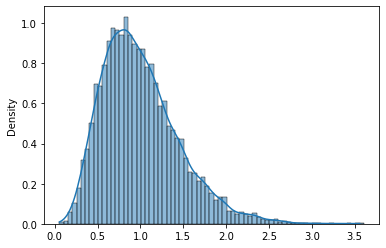

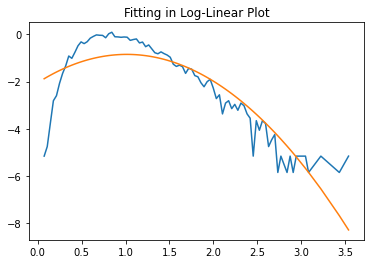

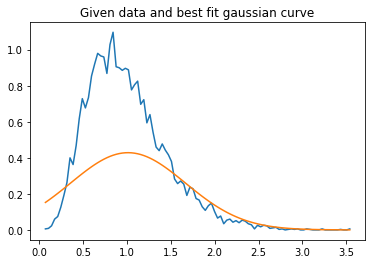

Linear coefficient (should be close to zero):  2.365976776024516
Normalization:  -2.046614186767353
Quadratic coefficient:  -1.1672074755237098
Standard Deviation of fitted gaussian:  0.6545019909378963
Expected Value of Standard Deviation  0.4472135954999579
Calculated value of Standard Deviation  0.44711761298562047


In [191]:
n = 5
means = demonstrate_clt(n,m,np.random.exponential,std,n)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))

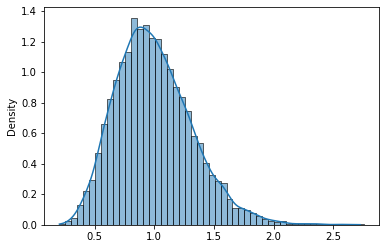

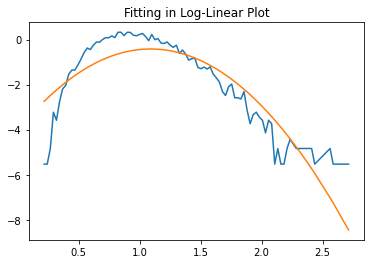

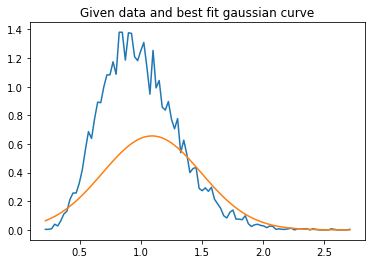

Linear coefficient (should be close to zero):  6.65685867934202
Normalization:  -4.051001296721675
Quadratic coefficient:  -3.051623306777319
Standard Deviation of fitted gaussian:  0.40478046091590025
Expected Value of Standard Deviation  0.31622776601683794
Calculated value of Standard Deviation  0.316635163738102


In [188]:
n = 10
means = demonstrate_clt(n,m,np.random.exponential,std,n)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))

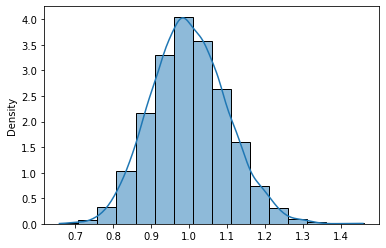

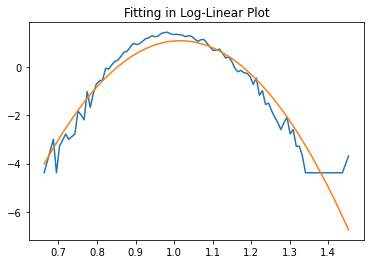

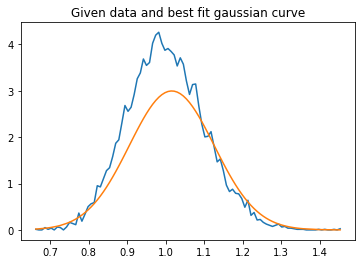

Linear coefficient (should be close to zero):  83.49359415402114
Normalization:  -41.308723050318555
Quadratic coefficient:  -41.097800186720036
Standard Deviation of fitted gaussian:  0.11030005119317174
Expected Value of Standard Deviation  0.1
Calculated value of Standard Deviation  0.09927471665517451


In [189]:
n = 100
means = demonstrate_clt(n,m,np.random.exponential,std,n)
p0,p1,p2= gauss_fit(means, num_bins=100, loglinear_plot=True)


print("Linear coefficient (should be close to zero): ", p1)
print("Normalization: ",p2)
print("Quadratic coefficient: ",p0)
sigma = np.sqrt(1/(-2*p0))
print("Standard Deviation of fitted gaussian: ",sigma)
print("Expected Value of Standard Deviation ", std/(np.sqrt(n)))
print("Calculated value of Standard Deviation ",np.std(means))

Note: In this case however, the Pearson_Correlation coefficient was doing a better job at convergence to 1 as compared to mse to 0. The MSE infact was increasing this time with more $n$. One might think that noise might be prop. to signal strength, but this was infact false for poissonian distribution.


In [197]:
# Let us now test the CLT and print the respective standard deviations for the first 5 powers of 10 = n
# We will change the std after

n = np.arange(1,176) # The number of random variables 
# belonging to the same Poisson Distribution (given standard deviation)

std_list = [0.50,0.75,1.00,1.25,1.50,2.00] # The list of standard deviation
# of the original distribution from which 'n' samples are taken and averaged over. 

std_calculated = [] # for storing calculated standard deviations for the 
# distribution of the means of the 'n' samples extracted from the base distribution

frac_errors =[] # Errors in standard deviations (deviation from theoretical value)

metric = [] #mtric to see how far CLT is satisfied

show_output=False
show_plot=False

for std in std_list:
    frac_errors_std = []
    metric_std = []
    # metric and error in standard deviation of 
    # distribution of mean for given standard deviation of base distribution
    
    print('Calculating for STD of base distribution: ',std)
    for i in n:

        means = demonstrate_clt(i,m,np.random.exponential,std,i,show_plot=False)

        # Creating a gaussian curve with mean mu of the original distribution,
        # and STD of the original curve divided by sqrt(i)
        
        # First we obtain the binned version of the means data:
        bin_centres,hist = get_histogram(means, num_bins=100)
        # Now, we smooth and remove zeros from this data
        bin_centres_sm,hist_sm = smoothen(hist, bin_centres)

        # Using this bin_centres_smoothed data, we will construct our reference gaussian curve
        mu = std # mean for exponential distribution
        sigma = std/np.sqrt(i) # standard deviation prescribed by central limit theorem
        ref_gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/(2*(sigma**2)))*((bin_centres_sm-mu)**2)) # reference gaussian curve

        if show_plot:
            if i%25==0:
                plt.plot(bin_centres_sm,hist_sm)
                plt.plot(bin_centres_sm,ref_gauss)
                plt.show()

        # Metric Calculations - to see how much the theoretical curve matches the observed curve
        #mse = metrics.mean_squared_error(ref_gauss,hist_sm)
        #metric_std.append(mse)
        corr,p = sp.stats.pearsonr(ref_gauss,hist_sm)
        metric_std.append(corr)

        # Standard Deviation of the output means data histogram
        mean_calc = np.average(means)
        std_calc = np.std(means)
        std_exp = sigma
        frac_errors_std.append(np.abs(std_exp-std_calc)/std_exp) 

        if i%50 == 0: 
            #print(corr)
            print(i)
    metric.append(metric_std)
    frac_errors.append(frac_errors_std)

Calculating for STD of base distribution:  0.5
50
100
150
Calculating for STD of base distribution:  0.75
50
100
150
Calculating for STD of base distribution:  1.0
50
100
150
Calculating for STD of base distribution:  1.25
50
100
150
Calculating for STD of base distribution:  1.5
50
100
150
Calculating for STD of base distribution:  2.0
50
100
150


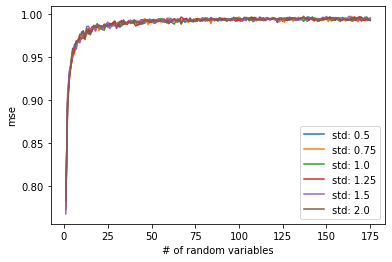

In [198]:
# We will now show the results of the experiments above
for i in range(len(std_list)):
    metric_std = metric[i]
    frac_errors_std = frac_errors[i]
    plt.plot(n,metric_std, label = "std: "+ str(std_list[i]))
plt.legend()
plt.ylabel('pearson correlation')
plt.xlabel('# of random variables')
plt.show()

In [202]:
# Calculating the threshold number of random variables to be summed over 
# for satisfying Central Limit theorem for a base distribution of sigma = 1

i = 5 # some small starting number of samples
std = 1
m = 10000
while True:

        means = demonstrate_clt(i,m,np.random.exponential,std,i,show_plot=False)

        # Creating a gaussian curve with mean mu of the original distribution,
        # and STD of the original curve divided by sqrt(i)
        
        # First we obtain the binned version of the means data:
        bin_centres,hist = get_histogram(means, num_bins=100)
        # Now, we smooth and remove zeros from this data
        bin_centres_sm,hist_sm = smoothen(hist, bin_centres)

        # Using this bin_centres_smoothed data, we will construct our reference gaussian curve
        mu = std # mean For exponential distribution
        sigma = std/np.sqrt(i) # standard deviation prescribed by central limit theorem
        ref_gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/(2*(sigma**2)))*((bin_centres_sm-mu)**2)) # reference gaussian curve

        # Metric Calculations - to see how much the theoretical curve matches the observed curve
        corr,p = sp.stats.pearsonr(ref_gauss,hist_sm)
        if corr > 0.99:
            break
        else:
            i += 1
            if i%100 == 0 : print(i)

print('Threshold number is: ', i)



Threshold number is:  27
